In [1]:
import tensorflow as tf

x = tf.ones(shape=(2, 1))
x

Metal device set to: Apple M1


2022-11-29 14:20:54.512863: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-29 14:20:54.513242: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [2]:
#랜덤 텐서
# 평균이 0이고 표준편차가 1인 정규분포에서 뽑은 랜덤한 값으로 만든 텐서
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.55578494],
       [ 0.5489352 ],
       [-0.44868067]], dtype=float32)>

In [3]:
#랜덤 텐서
#0과 1사이의 균등 분포에서 뽑은 랜덤한 값으로 만든 텐서
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.4411304],
       [0.8234185],
       [0.453583 ]], dtype=float32)>

In [4]:
# 넘파이와 달리 텐서플로우는 배열에 값을 수정할 수 없다. 즉 텐서를 업데이트할 수 없다.
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
v
# 다음과 같이 variable메소드에 넣어놓으면 수정 가능하다. 수정은 assign 메서드로 한다.

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.6029253 ],
       [-0.6892477 ],
       [-0.06389383]], dtype=float32)>

In [5]:
v.assign(tf.ones((3, 1))) # 텐서 전체 바꾸기


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [6]:
v[0, 0].assign(3.)

NotFoundError: No registered 'ResourceStridedSliceAssign' OpKernel for 'GPU' devices compatible with node {{node ResourceStridedSliceAssign}}
	 (OpKernel was found, but attributes didn't match) Requested Attributes: Index=DT_INT32, T=DT_FLOAT, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=3
	.  Registered:  device='DEFAULT'; T in [DT_INT32]
  device='CPU'; T in [DT_UINT64]
  device='CPU'; T in [DT_INT64]
  device='CPU'; T in [DT_UINT32]
  device='CPU'; T in [DT_UINT16]
  device='CPU'; T in [DT_INT16]
  device='CPU'; T in [DT_UINT8]
  device='CPU'; T in [DT_INT8]
  device='CPU'; T in [DT_INT32]
  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_BFLOAT16]
  device='CPU'; T in [DT_FLOAT]
  device='CPU'; T in [DT_DOUBLE]
  device='CPU'; T in [DT_COMPLEX64]
  device='CPU'; T in [DT_COMPLEX128]
  device='CPU'; T in [DT_BOOL]
  device='CPU'; T in [DT_STRING]
  device='CPU'; T in [DT_RESOURCE]
  device='CPU'; T in [DT_VARIANT]
 [Op:ResourceStridedSliceAssign] name: strided_slice/_assign

In [8]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

In [7]:
a = tf.ones((2,2))

In [9]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [10]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [52]:
# 선형 분류기 만들기
import numpy as np

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3],
                                                cov=[[1,0.5],[0.5,1]],
                                                size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3,0],
                                                cov=[[1,0.5],[0.5,1]],
                                                size=num_samples_per_class)
# negative_samples와 positive_samples는 모두 (1000, 2) 크기의 배열이며 이를 이제 수직으로 연결한다

negative_samples.shape

(1000, 2)

In [53]:
negative_samples

array([[ 0.04777755,  3.06807489],
       [-0.75491003,  3.06236268],
       [-1.31247431,  2.85480512],
       ...,
       [ 0.88819729,  1.63114076],
       [-0.00553675,  3.63462459],
       [-0.05624921,  3.14647203]])

In [55]:
negative_samples[:, 0]

(1000,)

In [51]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [13]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                    np.ones((num_samples_per_class, 1), dtype='float32')))

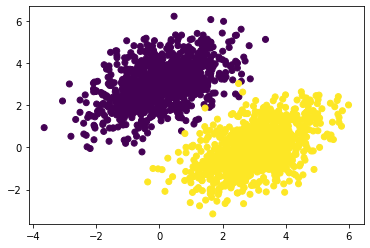

In [14]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0]) # 순서대로 x축, y축, z축
plt.show()
#이 두 포인트 클라우드를 구분할 수 있는 선형분류기는 아핀변환 prediction = W * input + b 이다.

In [15]:
input_dim = 2 #가중치 dim이 2인 이유는 x,y값이기 때문이다.
output_dim = 1 #output_dim이 1인 이유는 z값 하나이기 때문이다.
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

# W, b는 업데이트 가능해야하므로 

In [16]:
def model(inputs):
    return tf.matmul(inputs, W) + b
# 이 선형 분류기는 2D 입력을 다루기 때문에 W는 2개의 스칼라 가중치 w1, w2로 이루어진다 (W = [[w1], [w2]]) 반면 b는 하나의 스칼라 값이다.
# 즉 예측값 prediction = [[w1],[w2]] * [x, y] + b = w1 * x + x2 * y + b가 된다.

In [17]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)
# per_sample_losses는 targets나 predictions와 크기가 같은 텐서이며 각 샘플의 손실 값을 담고 있다.

In [18]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [19]:
for step in range(40):
    loss = training_step(inputs, targets)
    print("{}번째 스텝의 손실: {}".format(step, loss))

0번째 스텝의 손실: 4.46760892868042
1번째 스텝의 손실: 0.6006283164024353
2번째 스텝의 손실: 0.20384110510349274
3번째 스텝의 손실: 0.13714423775672913
4번째 스텝의 손실: 0.11980156600475311
5번째 스텝의 손실: 0.11040545254945755
6번째 스텝의 손실: 0.10278595238924026
7번째 스텝의 손실: 0.09597908705472946
8번째 스텝의 손실: 0.08979398012161255
9번째 스텝의 손실: 0.08415812999010086
10번째 스텝의 손실: 0.0790204405784607
11번째 스텝의 손실: 0.07433653622865677
12번째 스텝의 손실: 0.07006628811359406
13번째 스텝의 손실: 0.06617315858602524
14번째 스텝의 손실: 0.06262384355068207
15번째 스텝의 손실: 0.05938795953989029
16번째 스텝의 손실: 0.05643785372376442
17번째 스텝의 손실: 0.053748276084661484
18번째 스텝의 손실: 0.05129622295498848
19번째 스텝의 손실: 0.04906070604920387
20번째 스텝의 손실: 0.04702261462807655
21번째 스텝의 손실: 0.04516451433300972
22번째 스텝의 손실: 0.04347050189971924
23번째 스텝의 손실: 0.04192609712481499
24번째 스텝의 손실: 0.04051807522773743
25번째 스텝의 손실: 0.03923439979553223
26번째 스텝의 손실: 0.03806408867239952
27번째 스텝의 손실: 0.03699713200330734
28번째 스텝의 손실: 0.03602439910173416
29번째 스텝의 손실: 0.03513757511973381
30번째 스텝의 손실: 0.034329056

In [20]:
predictions = model(inputs)

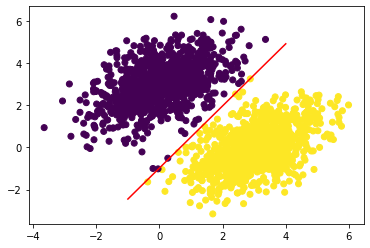

In [57]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)
plt.show()

In [ ]:
# 선형 분류기 정리

# 데이터의 형식은 다음과 같다.
# 인풋데이터는 2차원 텐서이며 (개수, 2) 2 : x,y값으로 이루어짐
# 타겟데이터는 0아니면 1로 구성된 1차원 텐서이다.

# 즉 수식으로는 W1*x + W2*y + b로 구성된 데이터(2차원)가 0아니면 1의 값을 가지는 상황이다.
# 하나의 층만 사용하고 배치는 없다. learning_rate는 비교적 크게 설정해야한다.

# W, b를 tf.Variable로 정의한다. W는 두개이며 하나의 값을 가지므로 shape=(2,1)이다. b는 하나의 값으로 (1,)이다. 
# def model을 통해 정방향패스 계산을 도출한다.
# def square_loss를 통해 손실함수 계산을 도출한다.
# def training_step을 통해 역전파로 하여금 가중치w1,w2,b를 수정한다.

# training_step에서는 인풋값과 타깃값을 받는다.
# gradient기록을 실행하고
# 구문안에서 predict값을 model함수로 뽑아내고, loss(타겟값, 프리딕트값)을 계산하는 코드를 넣는다.
# tape메소드를 통해 w에 대한 loss미분값(두개니까 벡터겠죠?)과 b에 대한 loss미분값을 받는다.
# learning_late * 미분값을 원래 W,b에 대해 뺀다.(assign_sub)
# 앞서 계산된 loss(타겟값, 프리딕트값)을 return으로 준다.

# training_step을 반복하여 W, b를 계속 업데이트 한다.




In [48]:
from tensorflow import keras
class SimpleDense(keras.layers.Layer): # 모든 케라스 층은 Layer클래스를 상속
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    def build(self, input_shape): # 가중치 생성하는 메소드
        print('build 메소드가 호출됨')
        input_dim = input_shape[-1] # (784개의 1데이터 들어갈 것)
        self.W = self.add_weight(shape=(input_dim, self.units), initializer='random_normal') #(784, 32)의 가중치 생성
        # add_weight는 가중치를 간편하게 만드는 메서드
        self.b = self.add_weight(shape=(self.units,), initializer='zeros') # (32, )의 b생성
    def call(self, inputs):
        print('call 메소드가 호출됨')
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        # 내적 계산은 다음과 같다.
        # activation((2, 784) * (784, 32) + (32, )) *** 정방향 패스 리턴되는 값의 shape는 (2, 32)로 나타난다.
        return y
    
# 상속된 Layer클래스에는 __call__()메서드가 존재한다.
# def __call__(self, inputs):
#     if not self.built:
#         self.build(inputs.shape)
#         self.built = True
#     return self.call(inputs)
# 다음의 메소드를 보면 아래의 셀에서 my_dense로 처음 dense객체를 정의한다. 그리고 my_dense(input_tensor)코드를 실행한다.
# 이것은 __call__()을 실행하는 것으로 상속된 Layer의 메소드인 __call__(input_tensor)이 실행된다.
# 만약 built가 false라면 self.build, 즉 우리가 SimpleDense에서 정의한 build를 실행한다.
# build에서는 자동적으로 입력텐서에 알맞게 가중치텐서를 만들어낸다. 여기서 처음 규정한 units가 사용된다. units는 출력shape에 관련된 것이다.
# build가 실행되면 가중치 텐서들이 규정된다. 그리고 끝으로 call메소드를 실행시킨다.
# call 메소드는 정방향 패스를 계산하며 활성화함수(y_pred)를 리턴값으로 뱉는다.

# 즉 my_dense = SimpleDense(~) -> my_dense(input_tensor)를 넣으면 units에 맞는 shape로의 출력값을 뱉는다.

# 이것이 하나의 층이며, 이러한 층은 여러개 겹칠 수 있고, 모델은 이러한 층을 통과하며 최종 y_pred값을 뱉는다.
# y_pred값은 target값에 의해 손실함수가 계산되고 이는 Gradient tape를 통해 이전의 층으로 이전의 층으로 가중치들을 업데이트 한다.(learning_late포함)
# 배치사이즈가 존재하여 배치로 나누어져있다면 하나의 배치에 대해 위의 과정을 진행한다. 그리고나면 가중치가 업데이트되며 loss가 개선되는 과정을 걸친다.
# epochs에 의해 업데이트된 가중치들을 기반으로 다시 위와같은 과정을 반복한다.

In [49]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
print(input_tensor[-1])
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

tf.Tensor(
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [59]:
class SimpleDense_test:
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def __call__(self, a, b):
        tmp = self.a + self.b
        print('__call__실행됨')
        return tmp

test = SimpleDense_test(1,2)
test(1,2)

__call__실행됨


3

In [37]:
# Layer 클래스의 __call__() 메서드가 자동 크기 추론뿐만 아니라 그래프실행사이를 전환하고 입력마스킹을 처리하는 등 더 많은 작업을 관리한다.

# compile step

In [ ]:
# 모델 구조 정의후 세가지를 더 선택해야한다.
# 손실함수 선택
# 옵티마이저 선택
# 측정 지표